In [1]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib


#Transforms
transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])


#Path for training and testing directory
train_path=r"C:\Users\rohin\Desktop\New folder (2)\biomet_pattern_and_people_detection\Task 2 DeepFakes Detection-20240228\cropped_cannyApplication\cropped_cannyApplication\datacanny\train"
#test_path=r"C:\Users\rohin\Desktop\New folder (2)\biomet_pattern_and_people_detection\Task 2 DeepFakes Detection-20240228\Task_1\Task_1\data_train2\test"

root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])


#CNN Network


class ConvNet(nn.Module):
    def __init__(self,num_classes=6):
        super(ConvNet,self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s) +1
        
        #Input shape= (256,3,150,150)
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (256,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #Shape= (256,12,150,150)
        self.relu1=nn.ReLU()
        #Shape= (256,12,150,150)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (256,12,75,75)
        
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (256,20,75,75)
        self.relu2=nn.ReLU()
        #Shape= (256,20,75,75)
        
        
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (256,32,75,75)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,75,75)
        self.relu3=nn.ReLU()
        #Shape= (256,32,75,75)
        
        
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
            
            
            #Above output will be in matrix form, with shape (256,32,75,75)
            
        output=output.view(-1,32*75*75)
            
            
        output=self.fc(output)
            
        return output
    
 

In [2]:

checkpoint=torch.load('edge_FE_01.model')
model=ConvNet(num_classes=2)
model.load_state_dict(checkpoint)
print(model.eval())    



ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=2, bias=True)
)


In [3]:
from PIL import Image

#prediction function
def prediction(img_path,transformer):
    
    image=Image.open(img_path)

    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    image_tensor=transformer(image).float()
    
    
    image_tensor=image_tensor.unsqueeze_(0)
    
    if torch.cuda.is_available():
        image_tensor.cuda()
        
    input=Variable(image_tensor)
    
    
    output=model(input)
    
    index=output.data.numpy().argmax()
    
    pred=classes[index]
    
    return pred


In [49]:

images_path_fake=glob.glob(r"C:\Users\rohin\Desktop\New folder (2)\biomet_pattern_and_people_detection\Task 2 DeepFakes Detection-20240228\Task_1\Task_1\data_eval\fake_task2" +'/*.jpg')

pred_dict={}

for idx, i in enumerate(images_path_fake):
    pred_dict[idx]=prediction(i,transformer)            

print(pred_dict)  

{0: 'real', 1: 'real', 2: 'fake', 3: 'real', 4: 'real', 5: 'real', 6: 'real', 7: 'real', 8: 'real', 9: 'real', 10: 'real', 11: 'real', 12: 'real', 13: 'fake', 14: 'real', 15: 'real', 16: 'real', 17: 'real', 18: 'real', 19: 'real', 20: 'real', 21: 'real', 22: 'real', 23: 'real', 24: 'fake', 25: 'real', 26: 'real', 27: 'real', 28: 'real', 29: 'real', 30: 'real', 31: 'real', 32: 'real', 33: 'real', 34: 'real', 35: 'fake', 36: 'real', 37: 'real', 38: 'real', 39: 'real', 40: 'real', 41: 'real', 42: 'real', 43: 'fake', 44: 'real', 45: 'real', 46: 'real', 47: 'real', 48: 'real', 49: 'real', 50: 'real', 51: 'real', 52: 'real', 53: 'real', 54: 'fake', 55: 'real', 56: 'real', 57: 'real', 58: 'real', 59: 'real', 60: 'real', 61: 'real', 62: 'real', 63: 'real', 64: 'real', 65: 'fake', 66: 'fake', 67: 'real', 68: 'real', 69: 'real', 70: 'fake', 71: 'real', 72: 'real', 73: 'real', 74: 'real', 75: 'real', 76: 'real', 77: 'real', 78: 'real', 79: 'real', 80: 'real', 81: 'fake', 82: 'real', 83: 'real', 8

In [50]:
images_path_real=glob.glob(r"C:\Users\rohin\Desktop\New folder (2)\biomet_pattern_and_people_detection\Task 2 DeepFakes Detection-20240228\Task_1\Task_1\data_eval\real_task2" +'/*.jpg')

pred_dict_real={}

for idx, i in enumerate(images_path_real):
    pred_dict_real[idx]=prediction(i,transformer)            

print(pred_dict_real)  

{0: 'real', 1: 'real', 2: 'fake', 3: 'real', 4: 'real', 5: 'real', 6: 'real', 7: 'real', 8: 'real', 9: 'real', 10: 'real', 11: 'real', 12: 'real', 13: 'fake', 14: 'real', 15: 'real', 16: 'real', 17: 'real', 18: 'real', 19: 'real', 20: 'real', 21: 'real', 22: 'real', 23: 'real', 24: 'fake', 25: 'real', 26: 'real', 27: 'real', 28: 'real', 29: 'real', 30: 'real', 31: 'real', 32: 'real', 33: 'real', 34: 'real', 35: 'fake', 36: 'real', 37: 'real', 38: 'real', 39: 'real', 40: 'real', 41: 'real', 42: 'real', 43: 'real', 44: 'real', 45: 'real', 46: 'fake', 47: 'real', 48: 'real', 49: 'real', 50: 'real', 51: 'real', 52: 'real', 53: 'real', 54: 'real', 55: 'real', 56: 'real', 57: 'fake', 58: 'real', 59: 'real', 60: 'real', 61: 'real', 62: 'real', 63: 'real', 64: 'real', 65: 'real', 66: 'real', 67: 'real', 68: 'fake', 69: 'real', 70: 'real', 71: 'real', 72: 'real', 73: 'real', 74: 'real', 75: 'real', 76: 'real', 77: 'real', 78: 'real', 79: 'fake', 80: 'real', 81: 'real', 82: 'real', 83: 'real', 8

In [51]:
# Calculate accuracy
true_labels = ['fake'] * len(images_path_fake) + ['real'] * len(images_path_real)
predicted_labels = list(pred_dict.values()) + list(pred_dict_real.values())

print(f"leng {len(true_labels)}")
print(f"leng {len(predicted_labels)}")

correct_predictions = sum(1 for true_label, predicted_label in zip(true_labels, predicted_labels) if true_label == predicted_label)
total_predictions = len(true_labels)
accuracy = correct_predictions / total_predictions

print(f'Accuracy: {accuracy:.4f}')

leng 513
leng 513
Accuracy: 0.5127


In [52]:
print(np.unique(true_labels_binary))
print(np.unique(predicted_probabilities))


[0 1]
[0. 1.]


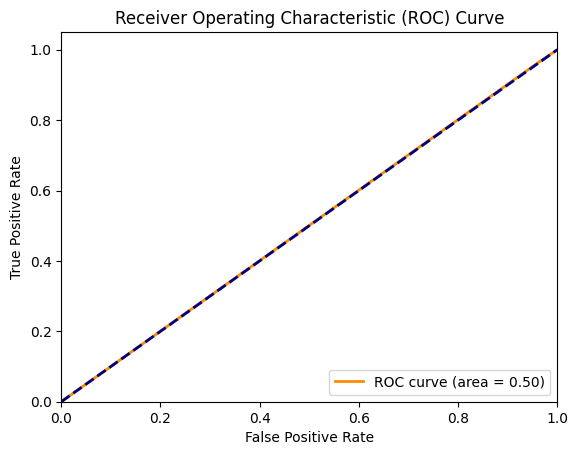

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example true labels and predicted probabilities
true_labels = ['fake'] * len(images_path_fake) + ['real'] * len(images_path_real)
predicted_probabilities = list(pred_dict.values()) + list(pred_dict_real.values())
# Convert predicted probabilities from strings to floats
# Assuming you want to convert probabilities to binary (1 if 'fake', 0 otherwise)
for i in range(len(predicted_probabilities)):
    if predicted_probabilities[i] == 'fake':
        predicted_probabilities[i] = 0
    else:
        predicted_probabilities[i] = 1

#print(predicted_probabilities)

predicted_probabilities = np.array(predicted_probabilities, dtype=float)

#print(predicted_probabilities)
# Converting 'fake' and 'real' labels to binary (0 and 1)
true_labels_binary = np.array([1 if label == 'real' else 0 for label in true_labels])

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels_binary, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
